# Load the raw data
This dataset is compiled by Johns Hopkins University and updated daily
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Here I forked their repository and use this app (https://github.com/apps/pull) to keep the forked repo updated.

In this notebook, I look at the global data only. For US data, see EDA_US.

In [6]:
import pandas as pd 
import os
import numpy as np
import plotly.graph_objects as go
import plotly
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Load data
print('Beginning data loading ...')

# Data directory
dir_parent = os.path.dirname(os.getcwd())
dir_data = os.path.join(dir_parent, 'COVID-19/csse_covid_19_data/csse_covid_19_time_series')

# Global case 
dir_global = os.path.join(dir_data, 'time_series_covid19_confirmed_global.csv')
global_case = pd.read_csv(dir_global)

# Global death
dir_global_death = os.path.join(dir_data, 'time_series_covid19_deaths_global.csv')
global_death = pd.read_csv(dir_global_death)
    
print('Data loading finished!')

Beginning data loading ...
Data loading finished!


# Explore and analyze confirmed cases

## Explore the data structure and basic information

In [140]:
# Let's look at a few rows
global_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,743,745,745,747,748,750,751,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,27,30,35,35,35,36,36


In [142]:
# Rename feature Country/Region to Country to avoid headache later
global_case.rename(columns={'Country/Region': 'Country'}, inplace=True)
global_case.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,743,745,745,747,748,750,751,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,27,30,35,35,35,36,36


In [143]:
# Basic information
unique_country_name = list(global_case['Country'].unique())
n_country = len(unique_country_name)
column_name = list(global_case.keys())
date_string = column_name[4:]
n_day = len(date_string)
print("Number of countries: " + str(n_country))
print("Number of recorded days: " + str(n_day))

Number of countries: 187
Number of recorded days: 106


In [144]:
# Collapse across countries 
global_case_collapse_country = global_case.groupby('Country').sum().reset_index()
global_case_collapse_country.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,743,743,743,745,745,747,748,750,751,751
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,27,27,27,27,30,35,35,35,36,36


## Look at top-15 countries with the most number of cases

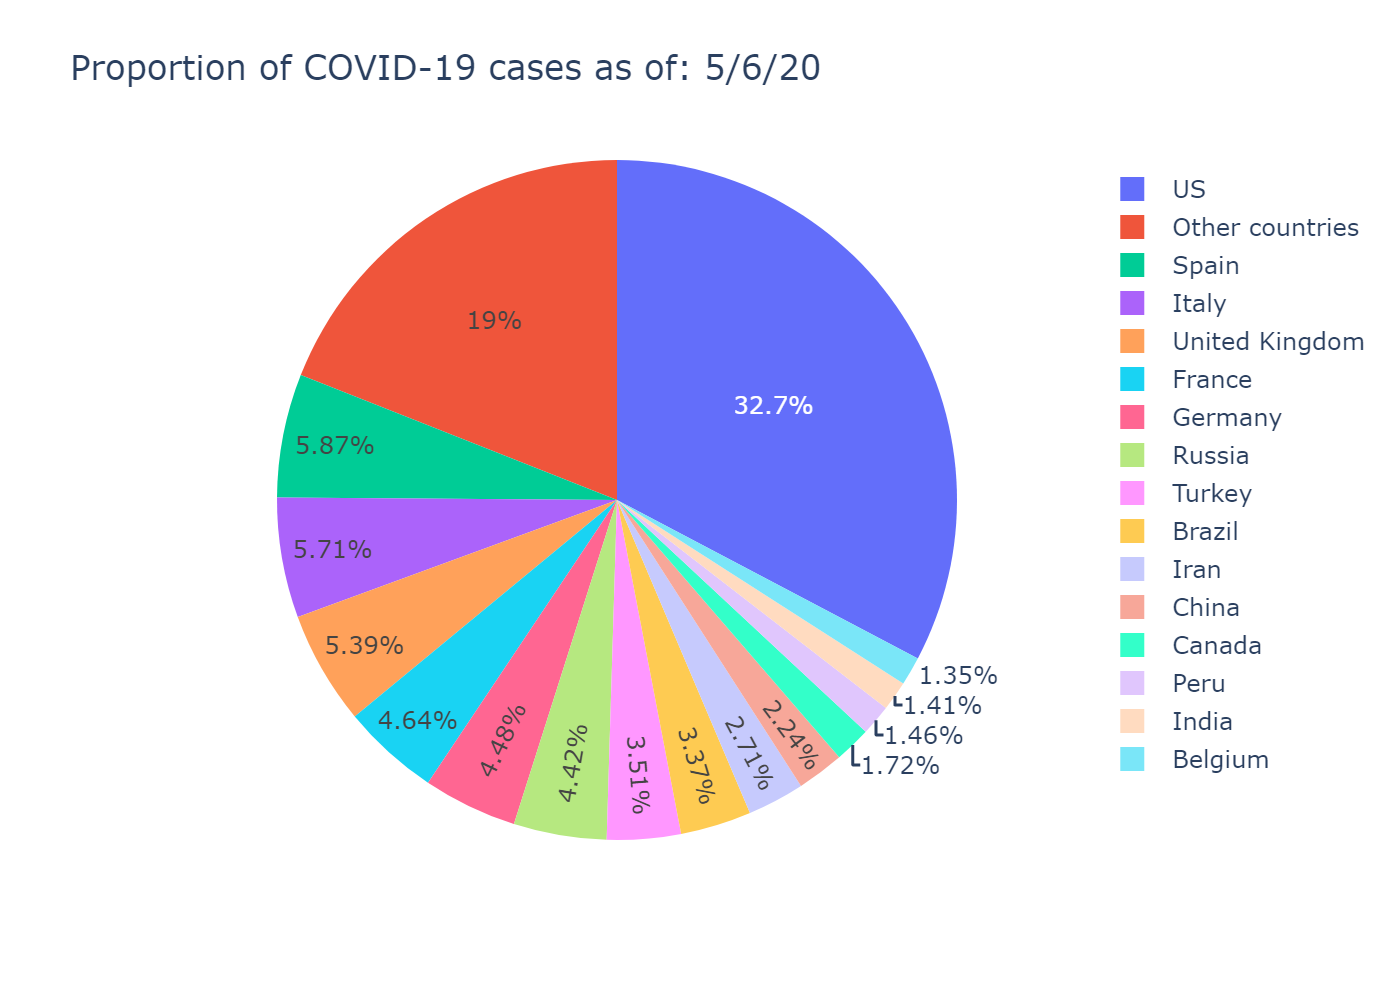

In [145]:
# Select top-15 countries and aggregate all other countries
top_country = global_case_collapse_country.nlargest(15, date_string[-1])
country_collapse_bottom = global_case_collapse_country.copy()
country_collapse_bottom.loc[country_collapse_bottom[date_string[-1]] < top_country[date_string[-1]].min(),
                            'Country'] = 'Other countries'

# Pie chart
fig = px.pie(country_collapse_bottom, values=date_string[-1], names='Country',
             title='Proportion of COVID-19 cases as of: ' + date_string[-1])

margin_size = 80
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

# Interactive plot
# fig.show()

# Static plot (to show the figures on Github, I have to convert to static image)
# For interactive plot, use the interactive plot above
Image(pio.to_image(fig, format='png', scale=2))

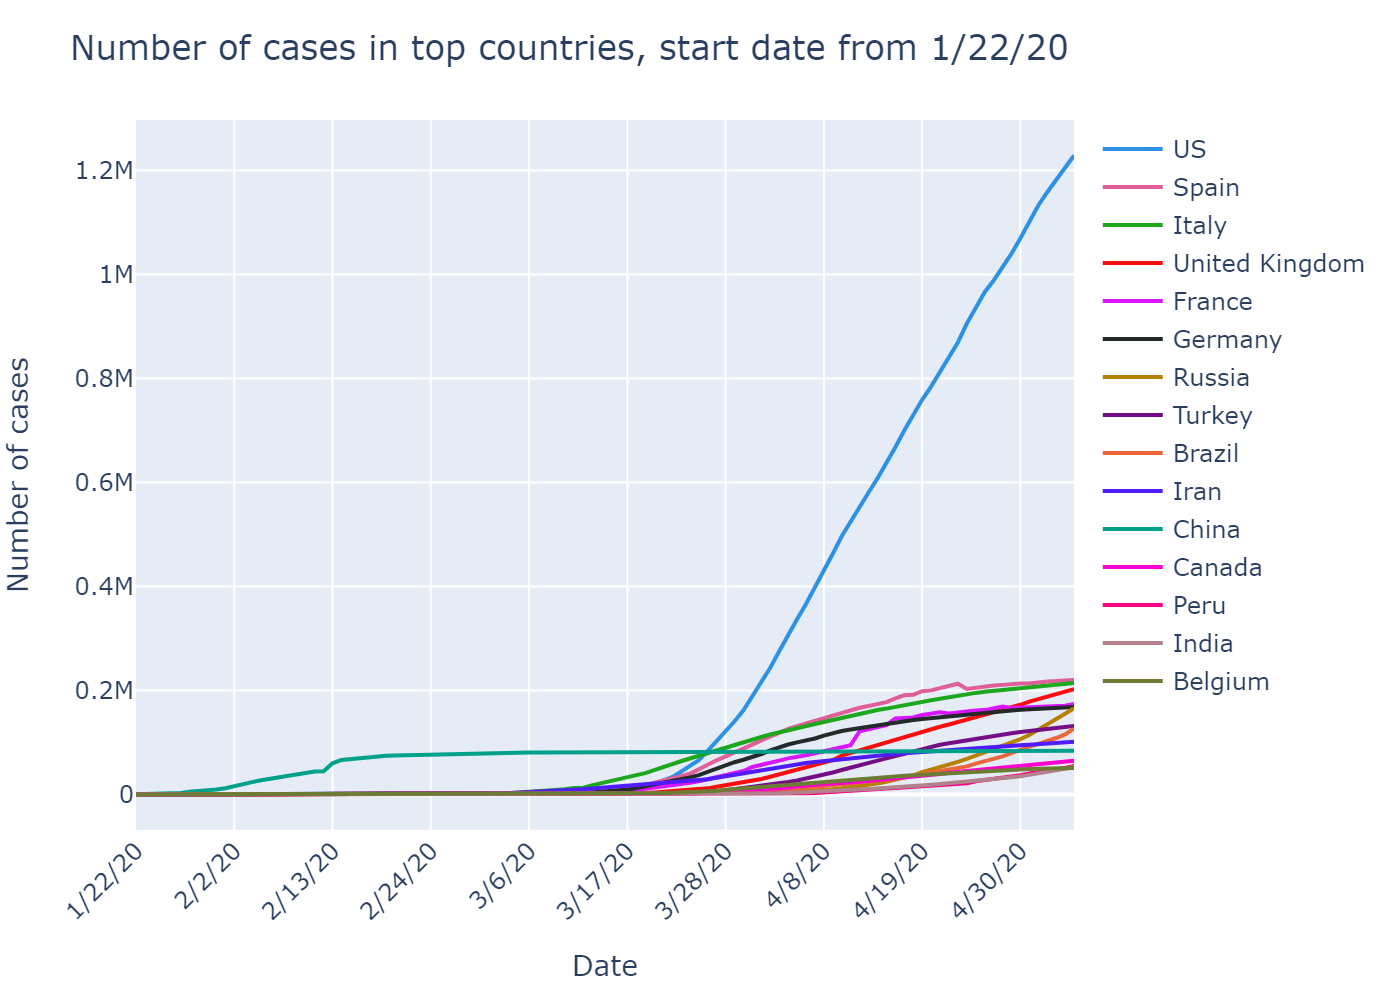

In [146]:
# Now let's look at the number of case across time for top countries
name_top_country = top_country['Country']
matrix_num_case = top_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_top_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))
    
margin_size = 60
fig.update_layout(title='Number of cases in top countries, start date from ' + date_string[0],
                   xaxis_title='Date',
                   yaxis_title='Number of cases',
                 margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))
fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Look at bottom-15 countries with the least number of cases

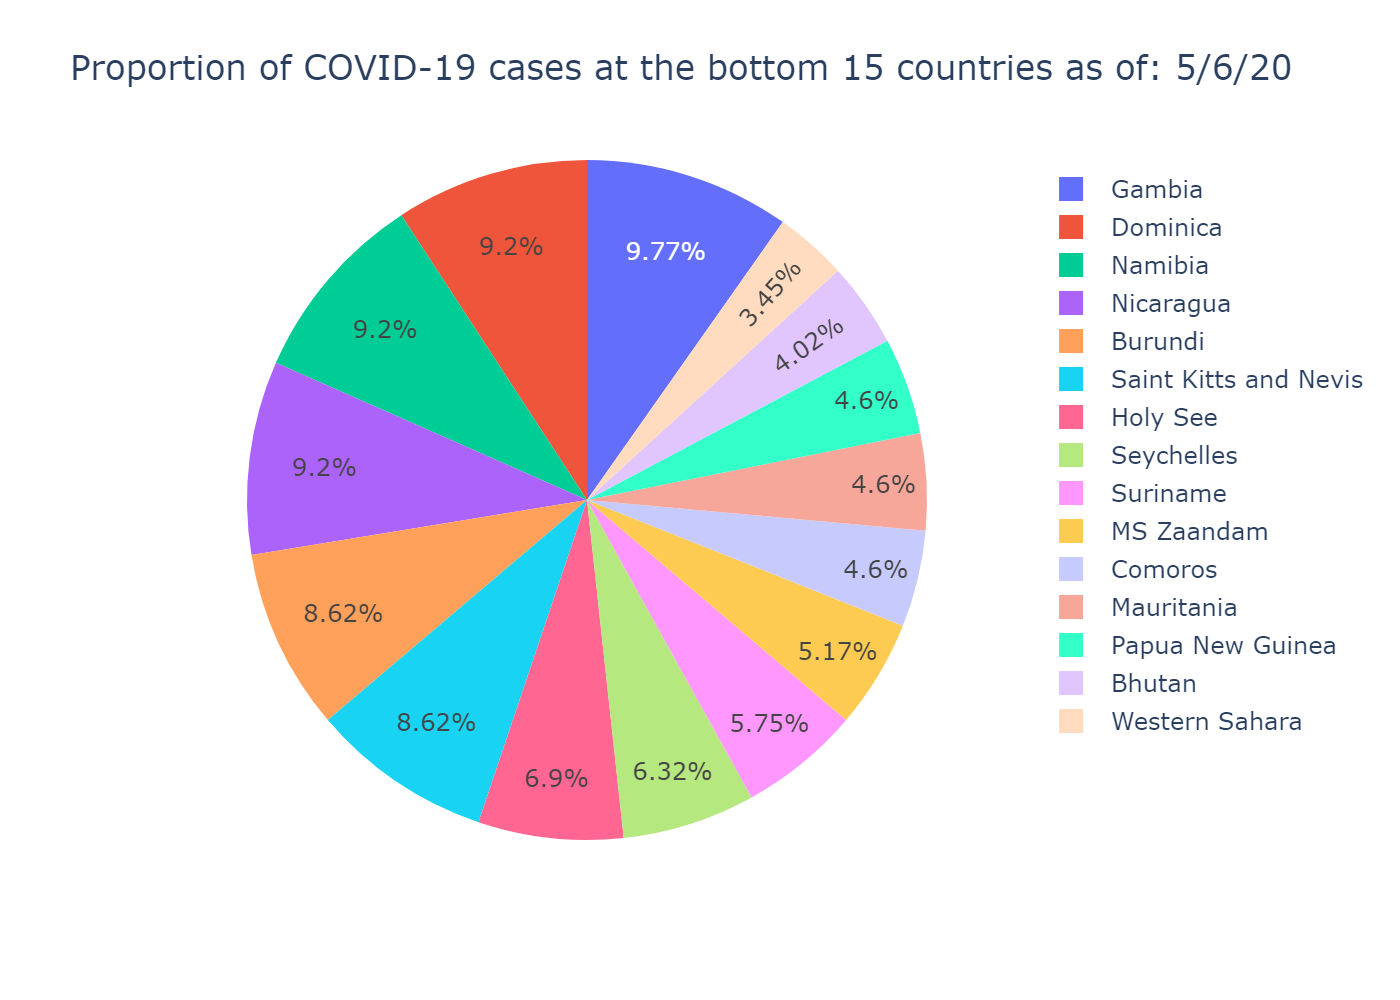

In [147]:
# Display the countries with the least number of cases
bottom_country = global_case_collapse_country.nsmallest(15, column_name[-1])
fig = px.pie(bottom_country, values=column_name[-1], names='Country',
             title='Proportion of COVID-19 cases at the bottom 15 countries as of: ' + column_name[-1])

margin_size = 80
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

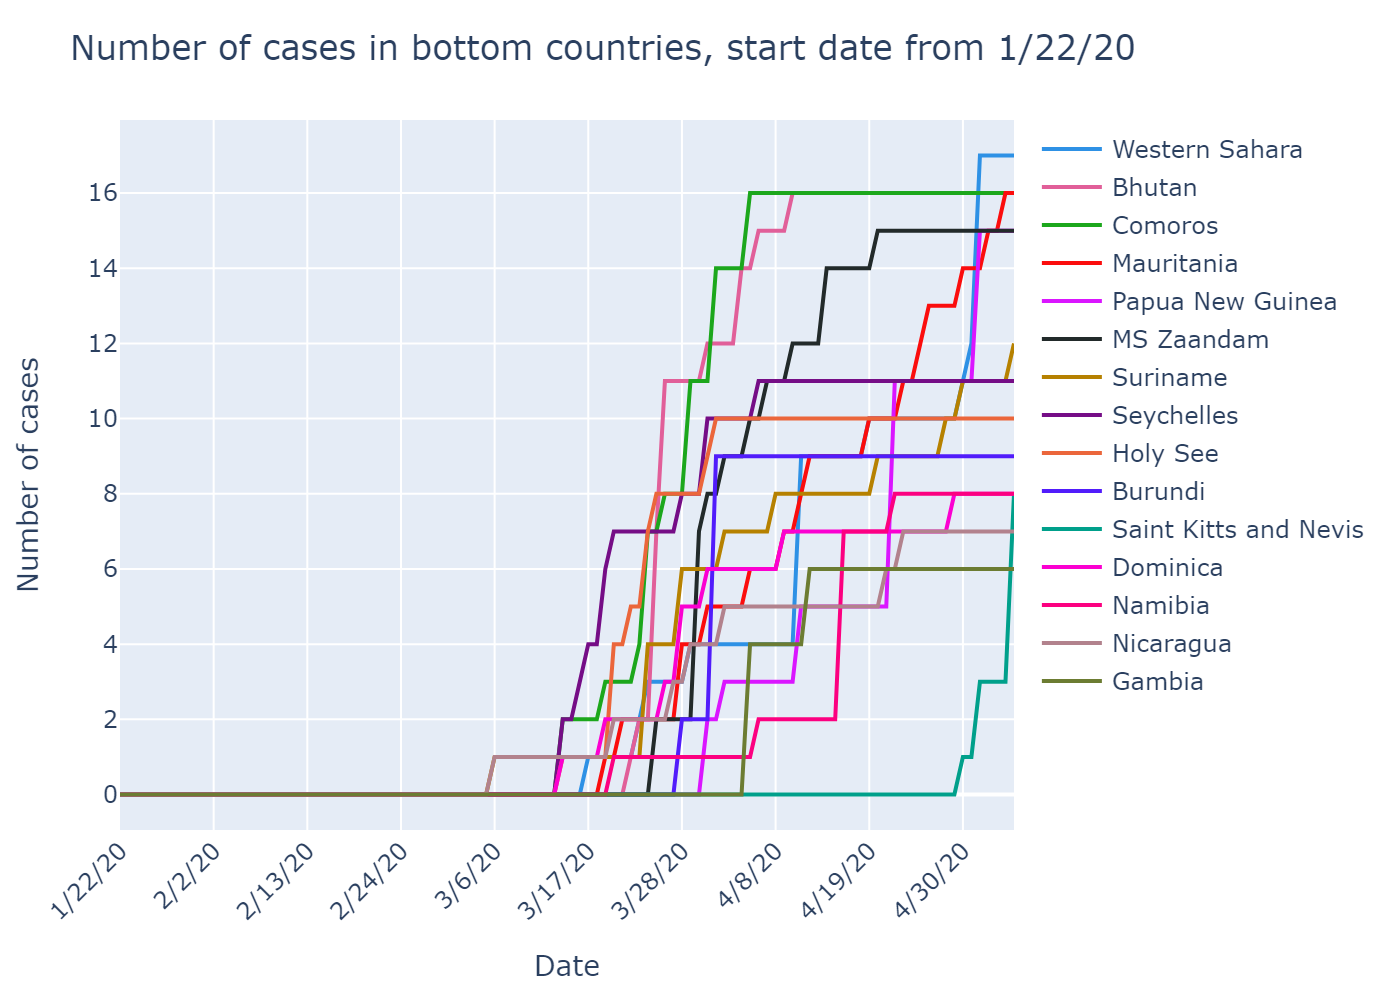

In [148]:
# Now let's look at the number of case across time for bottom countries
name_bottom_country = bottom_country['Country']
bottom_country.sort_values(by=[date_string[-1]], ascending=False, inplace=True)
matrix_num_case = bottom_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_bottom_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))

margin_size = 60
fig.update_layout(title='Number of cases in bottom countries, start date from ' + date_string[0],
                   xaxis_title='Date',
                   yaxis_title='Number of cases',
                 margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Something more fancy: number of cases on world map

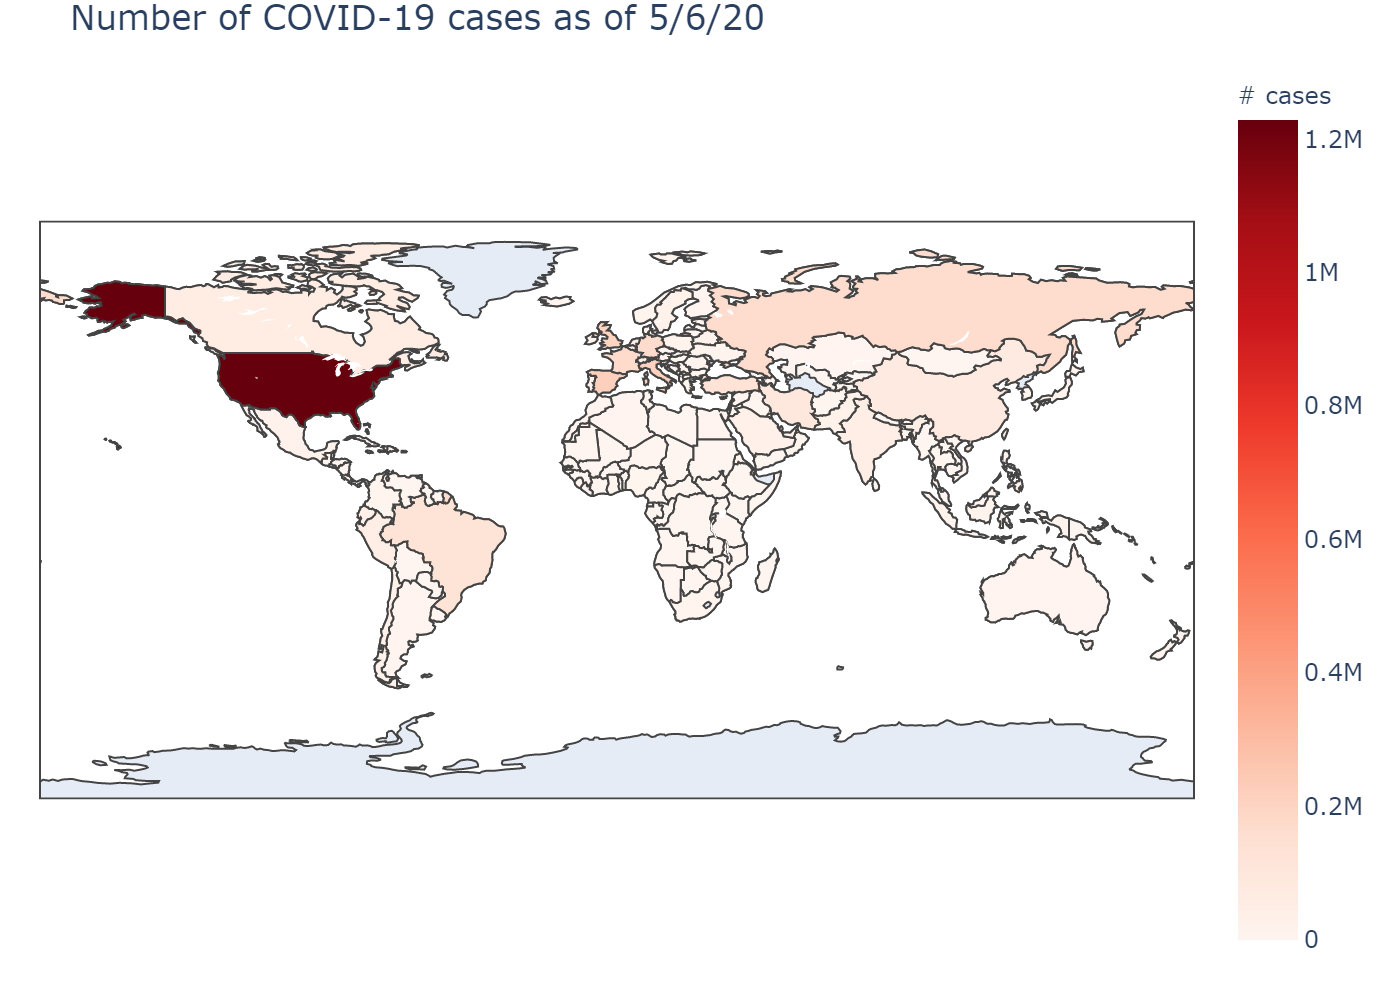

In [149]:
# Use plotly Choropleth built-in map
fig = go.Figure(data=go.Choropleth(
    locations=global_case_collapse_country["Country"], # Country names
    locationmode = 'country names', # set the mode to country name
    z = global_case_collapse_country[date_string[-1]].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "# cases",
))

fig.update_layout(
    title_text = 'Number of COVID-19 cases as of ' + date_string[-1],
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

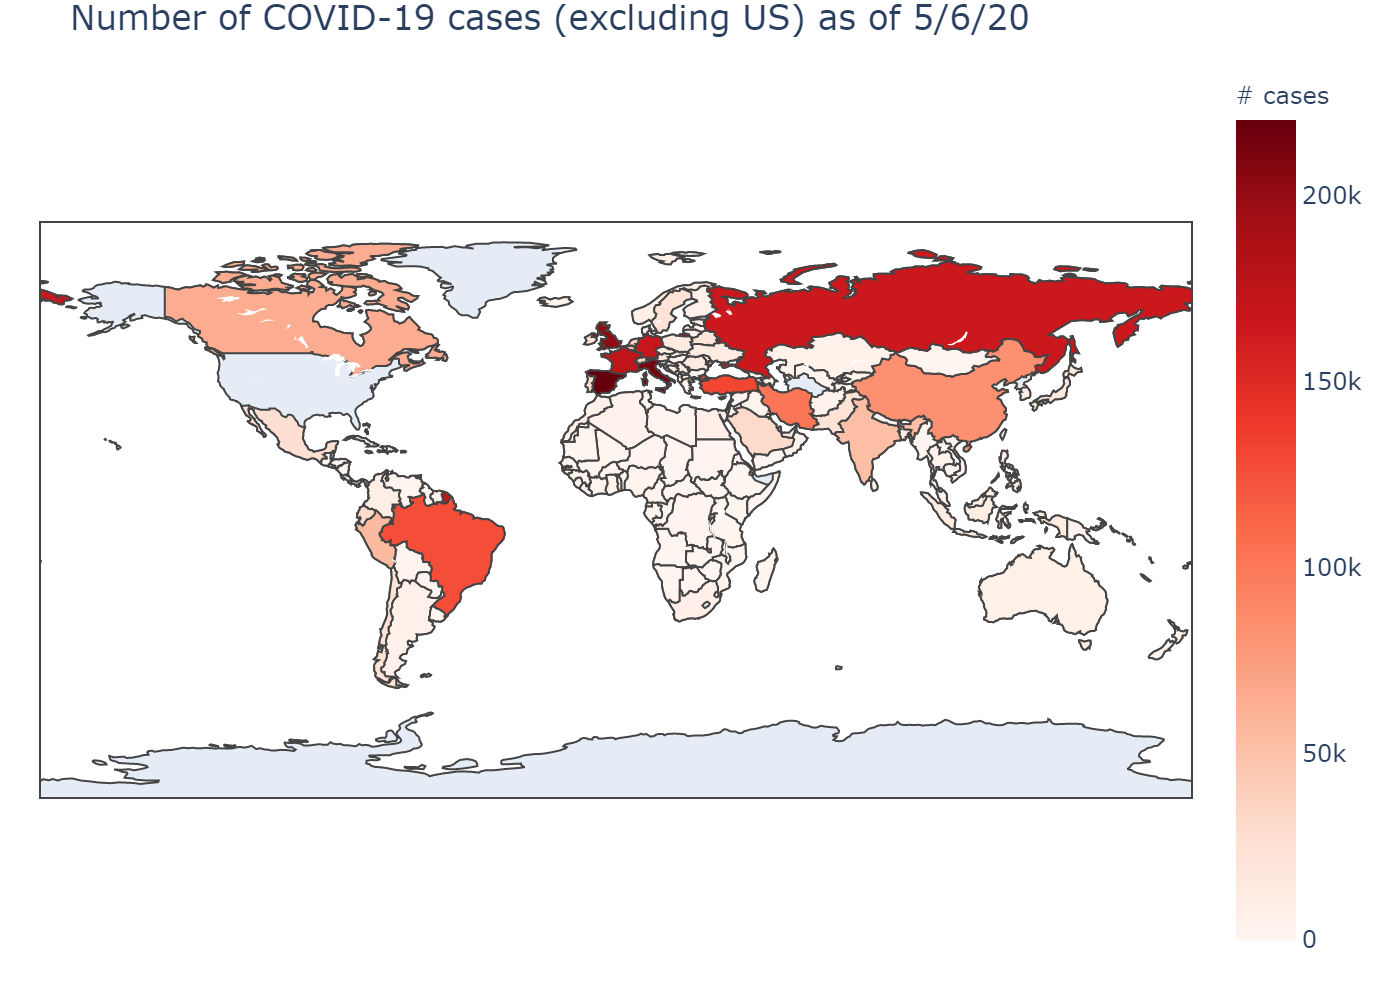

In [152]:
# Exclude US
global_case_collapse_country_excludeUS = global_case_collapse_country[global_case_collapse_country.Country != 'US']

fig = go.Figure(data=go.Choropleth(
    locations=global_case_collapse_country_excludeUS["Country"], # Country names
    locationmode = 'country names', # set the mode to country name
    z = global_case_collapse_country_excludeUS[date_string[-1]].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "# cases",
))

fig.update_layout(
    title_text = 'Number of COVID-19 cases (excluding US) as of ' + date_string[-1],
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Explore correlation of case number and countries' features